In [13]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from IPython.display import Image


In [14]:
# Ce code est une série d'instructions utilisant la bibliothèque Pandas pour charger plusieurs fichiers
# CSV contenant des données relatives à un projet Airbnb. Chaque fichier CSV contient des
# informations spécifiques qui seront utilisées pour l'analyse ou la modélisation.

country = pd.read_csv('C:/Users/ASUS/Desktop/Jupyterproject/Airbnb/countries.csv')
age_gender = pd.read_csv('C:/Users/ASUS/Desktop/Jupyterproject/Airbnb/age_gender_bkts.csv')
sample_submission = pd.read_csv('C:/Users/ASUS/Desktop/Jupyterproject/Airbnb/sample_submission_NDF.csv')
session = pd.read_csv('C:/Users/ASUS/Desktop/Jupyterproject/Airbnb/sessions.csv')
test_user = pd.read_csv('C:/Users/ASUS/Desktop/Jupyterproject/Airbnb/test_users.csv')
train_user= pd.read_csv('C:/Users/ASUS/Desktop/Jupyterproject/Airbnb/train_users_2.csv')

In [15]:
# ce code affiche la forme de chaque dataframe chargé à partir des fichiers CSV, 
# ce qui vous permet de comprendre la taille de chaque ensemble de données
# et la quantité d'informations contenues dans chaque dataframe.

print('country' ,country.shape)

print('age_gender',age_gender.shape)

print('sample_submission' ,sample_submission.shape)

print('session',session.shape)

print('test_user' ,test_user.shape)

print('train_user' ,train_user.shape)

print('session' ,train_user.shape)


country (10, 7)
age_gender (420, 5)
sample_submission (62096, 2)
session (10567737, 6)
test_user (62096, 15)
train_user (213451, 16)
session (213451, 16)


In [16]:
# ce code génère un dataframe de résumé appelé info_dataset qui contient des informations telles 
# que le nombre de colonnes, les noms de colonnes et le nombre de lignes pour chaque ensemble de données chargé 
# à partir des fichiers CSV. Le style de dégradé de couleur 
# est appliqué pour faciliter la visualisation des informations.

dataset = [country , age_gender ,session,sample_submission , test_user , train_user]
titles = ["countries","age_genders","sessions","sample_submission", "test_users","train_users"]
info_dataset = pd.DataFrame({},)
info_dataset['dataset']= titles



info_dataset = pd.DataFrame({},)
info_dataset['dataset']= titles

info_dataset['no_of_columns']= [len(df.columns) for df in dataset ]
info_dataset['columns_name']= [', '.join(list(df.columns)) for df in dataset] 
info_dataset['no_of_rows'] = [len(df) for df in dataset]
info_dataset.style.background_gradient(cmap ='Greys')

,dataset,no_of_columns,columns_name,no_of_rows
0,countries,7,"country_destination, lat_destination, lng_destination, distance_km, destination_km2, destination_language , language_levenshtein_distance",10
1,age_genders,5,"age_bucket, country_destination, gender, population_in_thousands, year",420
2,sessions,6,"user_id, action, action_type, action_detail, device_type, secs_elapsed",10567737
3,sample_submission,2,"id, country",62096
4,test_users,15,"id, date_account_created, timestamp_first_active, date_first_booking, gender, age, signup_method, signup_flow, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser",62096
5,train_users,16,"id, date_account_created, timestamp_first_active, date_first_booking, gender, age, signup_method, signup_flow, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser, country_destination",213451


In [17]:
# ce code vise à vous montrer combien de valeurs nulles sont présentes dans chaque colonne de chaque dataframe.
# Cela peut aider à identifier les zones où les données manquent et à prendre des décisions sur la gestion 
# de ces valeurs manquantes dans l'analyse ou la modélisation ultérieure.

print(country.isnull().sum())

print(age_gender.isnull().sum())

print(sample_submission.isnull().sum())

print(session.isnull().sum())

print(test_user.isnull().sum())

print(train_user.isnull().sum())


country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64
age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64
id         0
country    0
dtype: int64
user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64
id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tra

In [22]:
# Ce code vise à vous montrer combien de valeurs manquantes (ou valeurs nulles) sont présentes dans chaque colonne 
# de chaque dataframe. Cela peut vous aider à identifier les zones où les données manquent et à décider comment
# gérer ces valeurs manquantes dans l'analyse ou la modélisation ultérieure.

print(country.isna().sum())

print(age_gender.isna().sum())

print(sample_submission.isna().sum())

print(session.isna().sum())

print(test_user.isna().sum())

print(train_user.isna().sum())

country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64
age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64
id         0
country    0
dtype: int64
user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64
id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tra

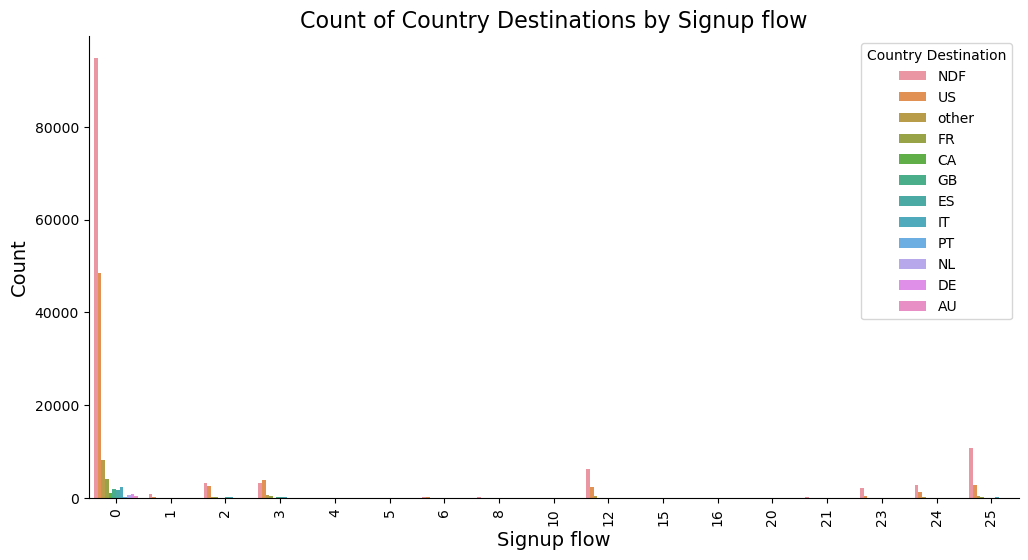

In [19]:
#  ce code génère un graphique de comptage des destinations par flux d'inscription pour les utilisateurs d'entraînement.
#     Chaque barre représente le nombre d'utilisateurs ayant choisi un certain flux d'inscription, coloré selon
#     leur destination de pays. Ce graphique permet de visualiser les tendances de destinations en fonction
#     des choix de flux d'inscription.


signup_flow = train_user["signup_flow"]
country_destination = train_user["country_destination"]

# Créer un graphique de comptage des destinations par signup flow
plt.figure(figsize=(12, 6))
sns.countplot(x=signup_flow, hue=country_destination, data=train_user)
plt.title('Count of Country Destinations by Signup flow', fontsize=16)
plt.xlabel('Signup flow', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Country Destination')
plt.xticks(rotation=90)
sns.despine()
plt.show()


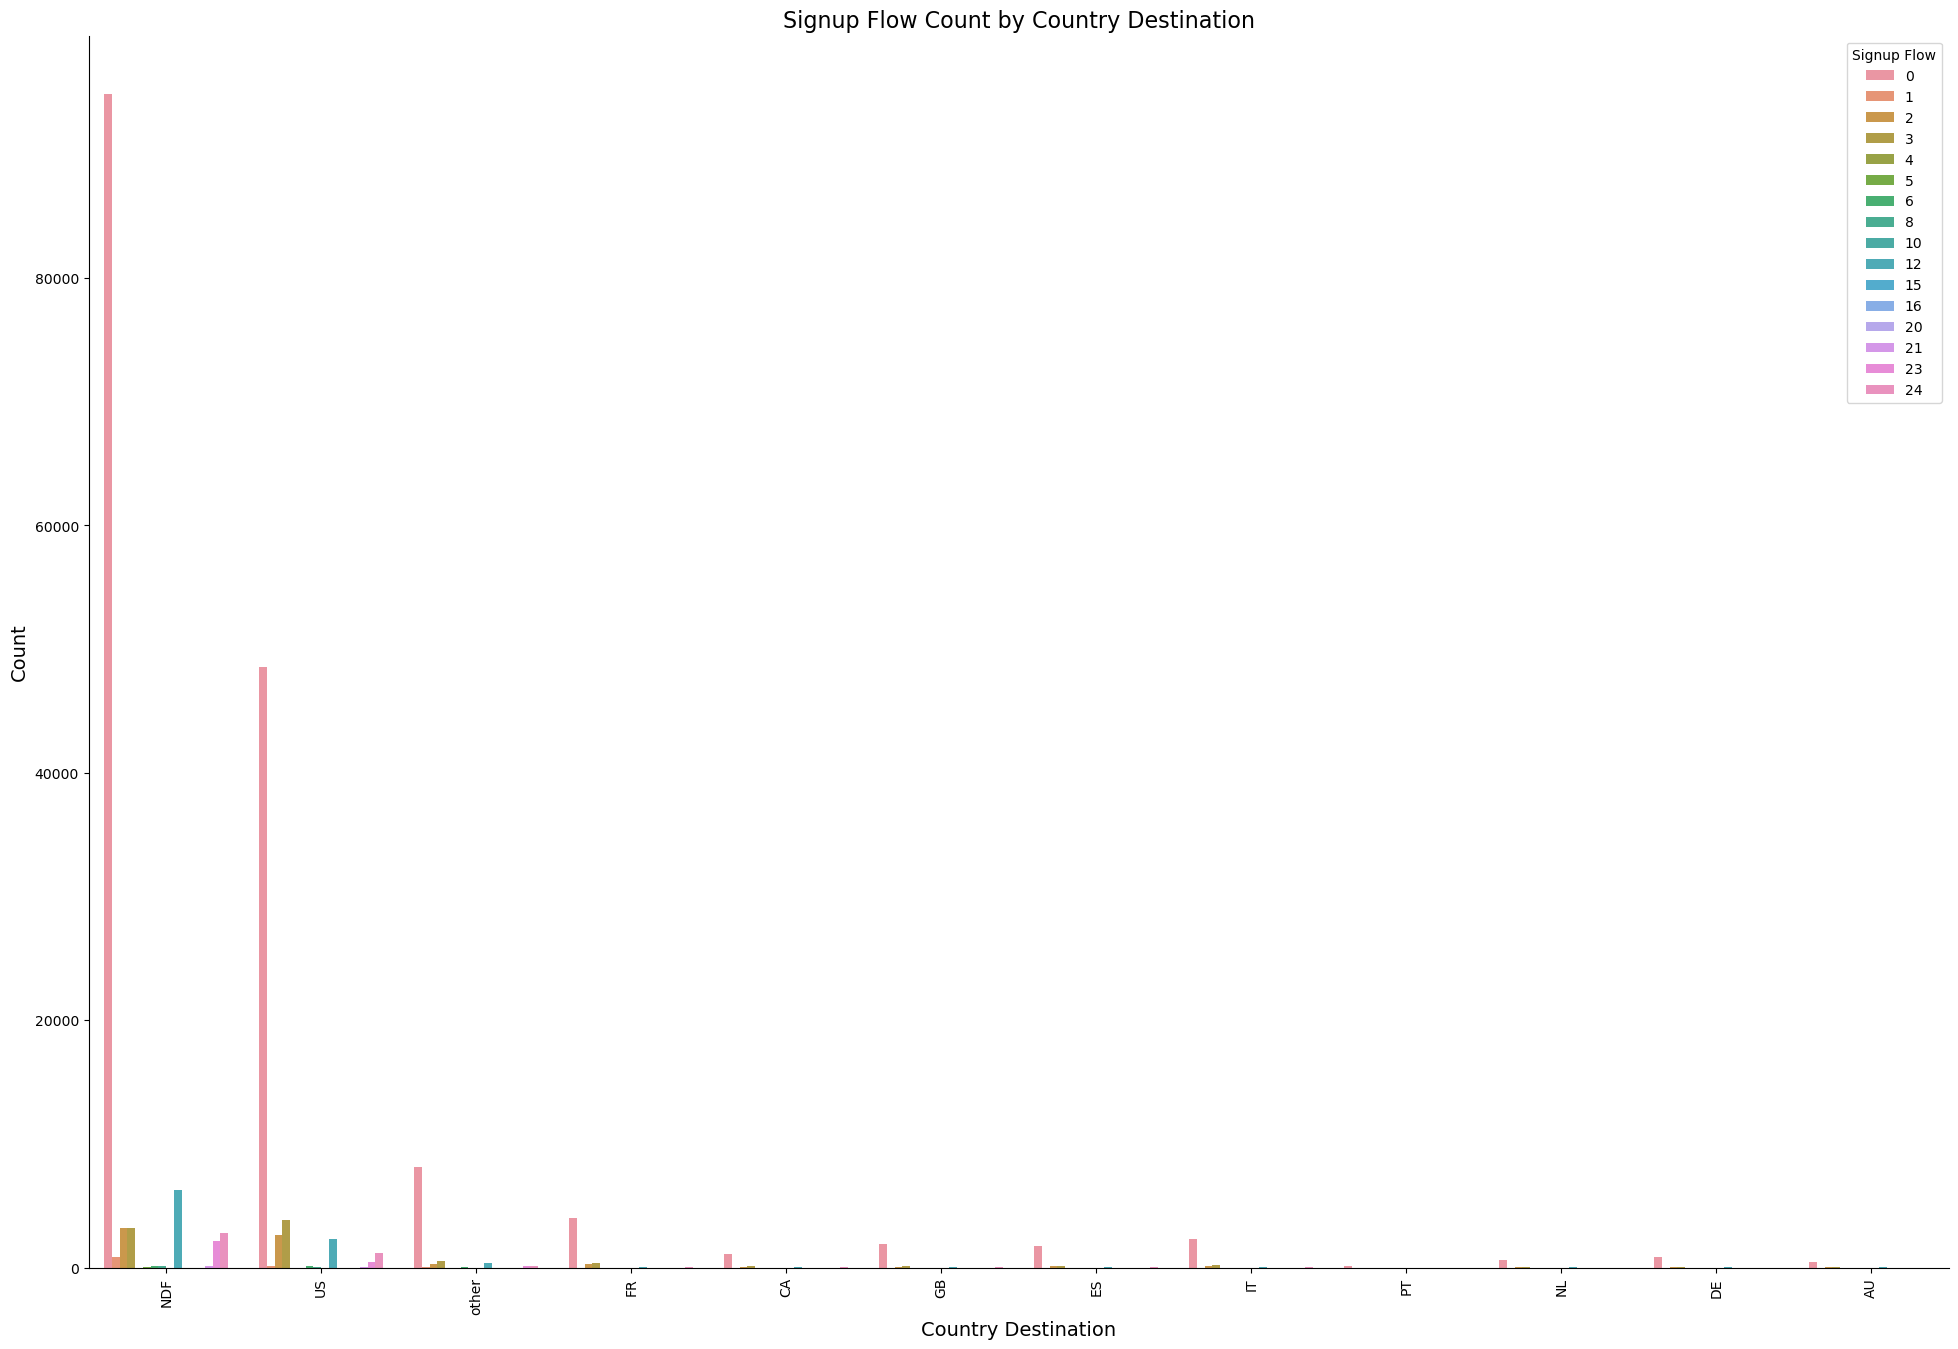

In [20]:
# ce code génère un graphique de comptage des flux d'inscription par destination de pays pour les utilisateurs d'entraînement.
# Chaque barre représente le nombre d'utilisateurs ayant choisi un certain flux d'inscription, coloré selon
# leur destination de pays. Le graphique est agrandi pour permettre une visualisation
# plus détaillée des résultats.

filtered_data = train_user[train_user['signup_flow'] < 25]  # Vous pouvez ajuster la condition ici
plt.figure(figsize=(24, 16))
sns.countplot(data=filtered_data, x='country_destination', hue='signup_flow')
plt.title('Signup Flow Count by Country Destination', fontsize=16)
plt.xlabel('Country Destination', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Signup Flow')
plt.xticks(rotation=90)
sns.despine()
plt.show()


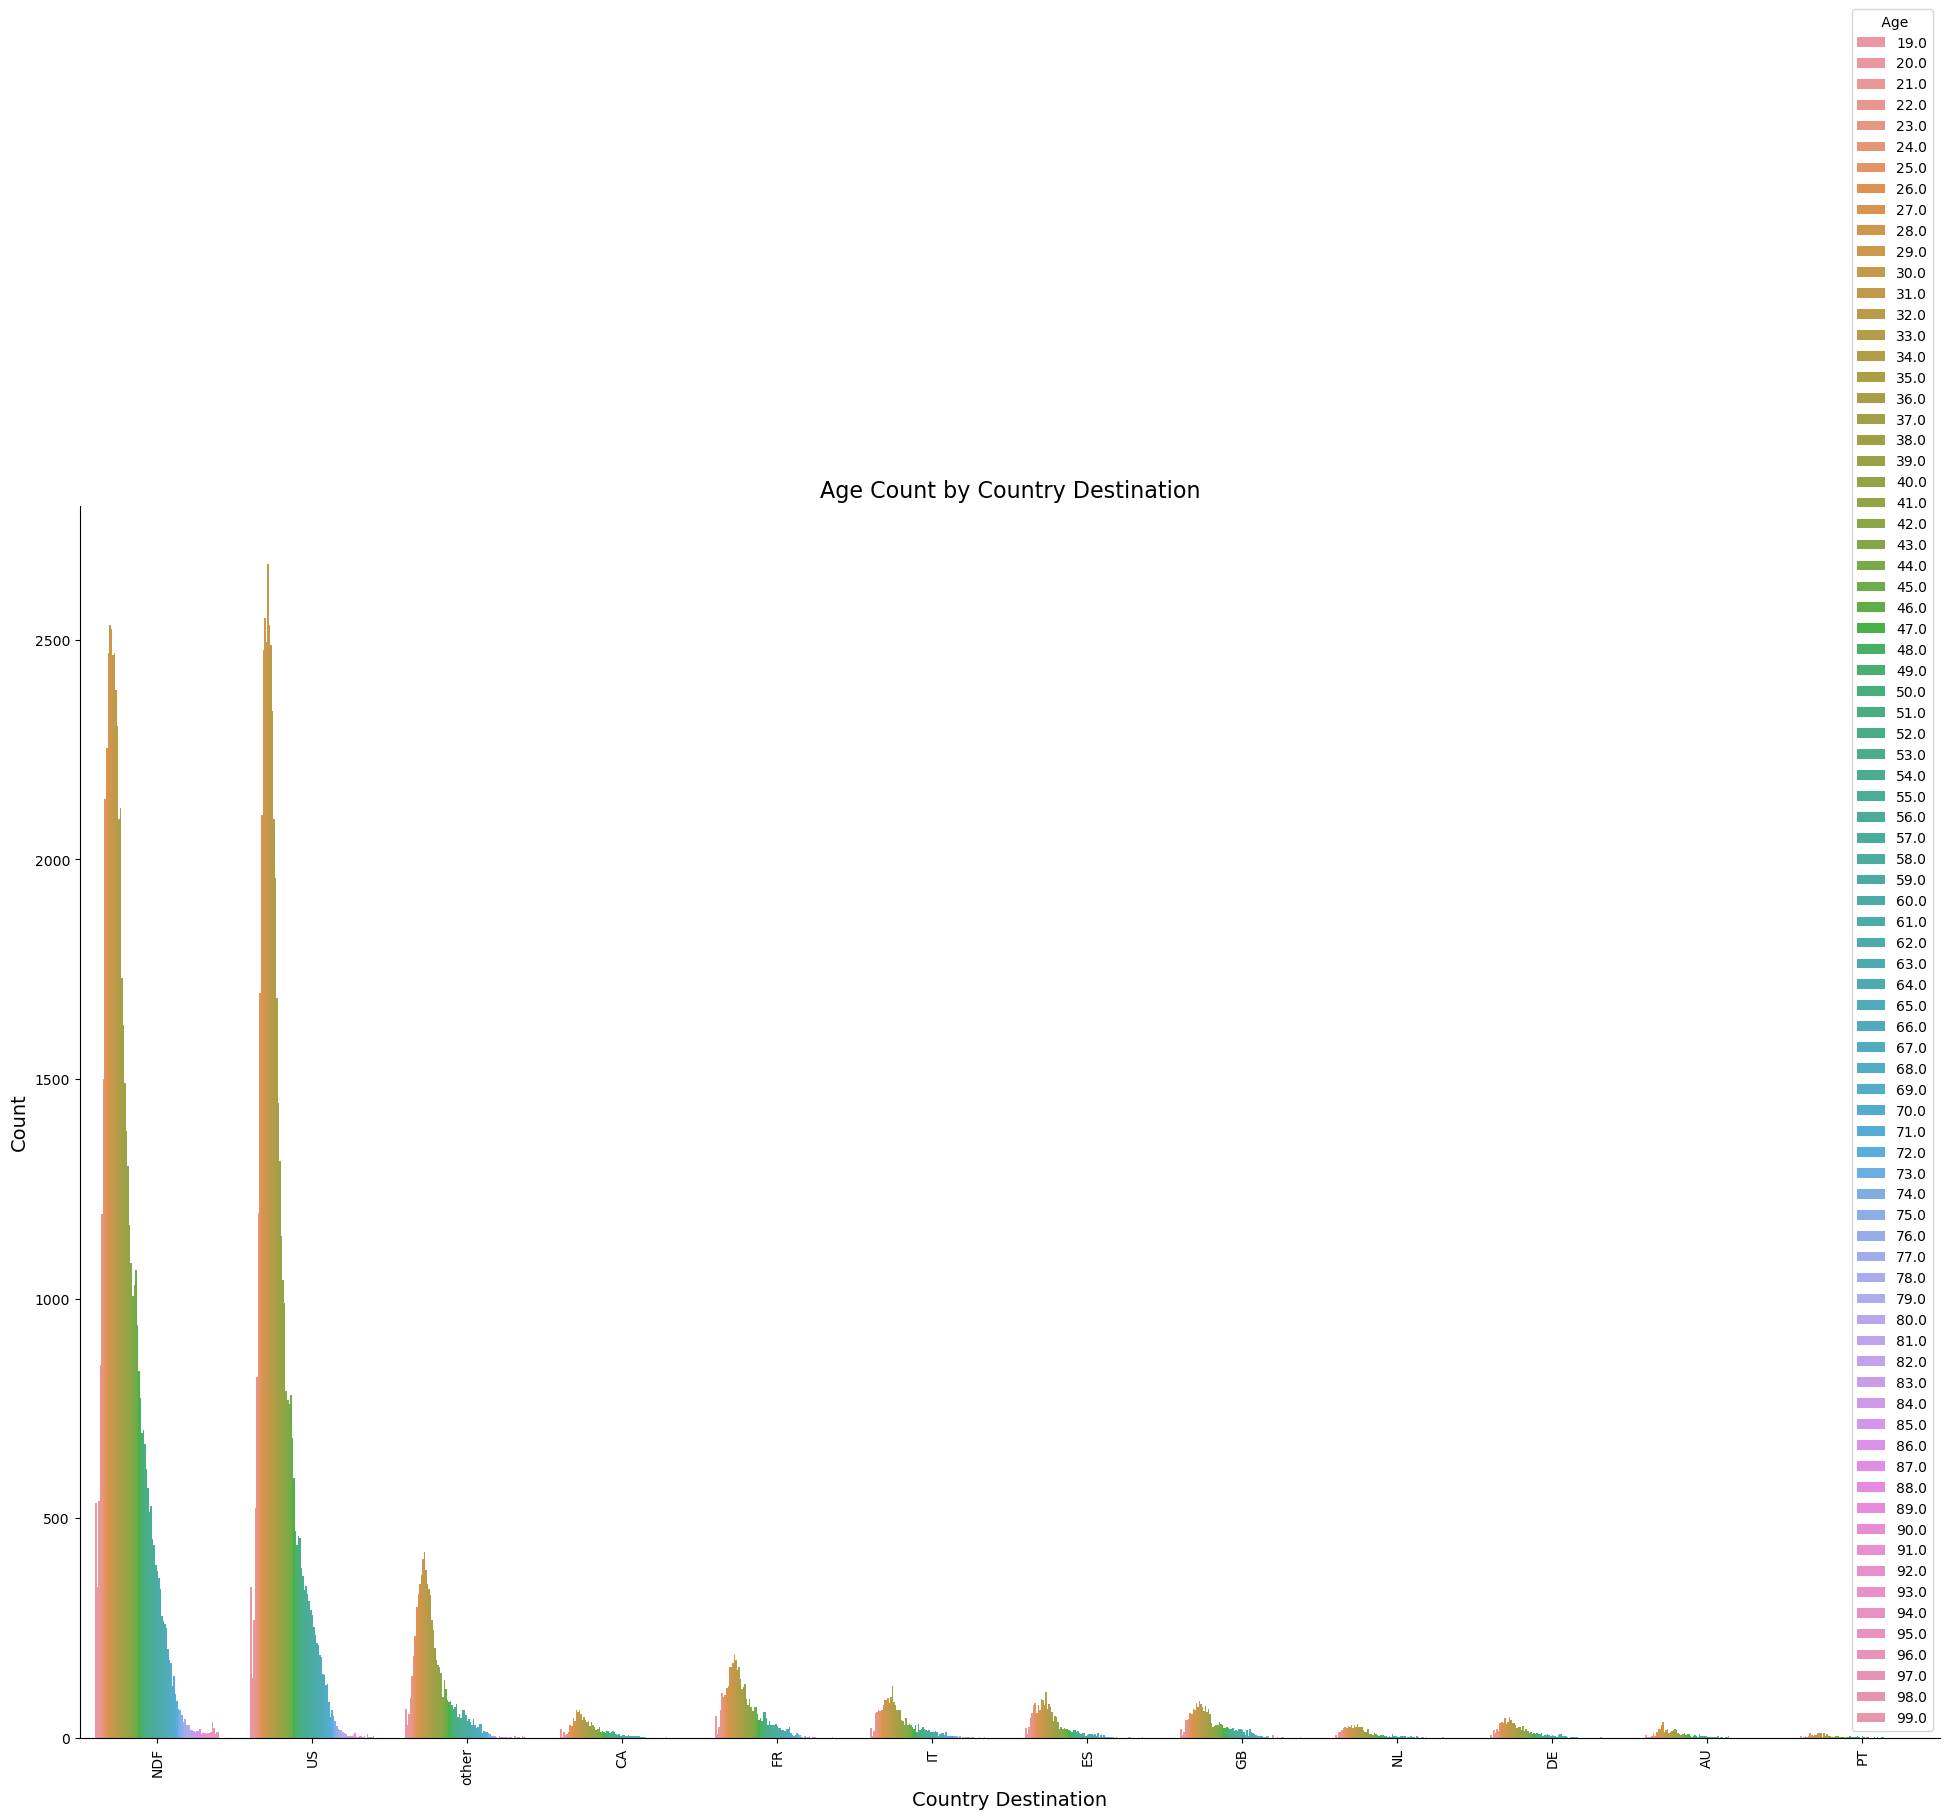

In [21]:
# ce code génère un graphique de comptage des tranches d'âge par destination de pays pour les utilisateurs d'entraînement.
# Chaque barre représente le nombre d'utilisateurs d'une certaine tranche d'âge, coloré selon leur destination de pays.
# Le graphique est agrandi pour permettre une visualisation plus détaillée des résultats.

filtered_data = train_user[(train_user['age'] > 18) & (train_user['age'] < 100)]  # Vous pouvez ajuster la condition ici
plt.figure(figsize=(24, 16))
sns.countplot(data=filtered_data, x='country_destination', hue='age')
plt.title('Age Count by Country Destination', fontsize=16)
plt.xlabel('Country Destination', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title=' Age')
plt.xticks(rotation=90)
sns.despine()
plt.show()
